In [4]:
#data manipulation
import pandas as pd
from pandas import DataFrame as df

#plotting
import matplotlib.pyplot as plt 
import seaborn as sns  

#numerical operation
import numpy as np 

# date and time function
import datetime

# Grouping consecutive elements
from itertools import groupby

#Data Visualization
from matplotlib.gridspec import GridSpec

#Statistical Operations 
from scipy import stats 

#Machine Learning and Data Analysis Functions
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn import treeXGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Suppressing Warning
import warnings
warnings.filterwarnings('ignore')

In [5]:

#Data Reading & Format Change
data = pd.read_csv("data1.csv", sep =";", decimal=",")
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.lower()

for i in data.select_dtypes(include = ['object']).columns.values:
        data[i] = data[i].replace(["yes","no"], [1,0])

categorical_columns = ["location_code", "push_status", "credit_card_info_save"]
out_of_analyze = ["user_id", "churn"]
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

#Definition of Variables and First Look at the Data
data.head()

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,0,1,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,0,1,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,0,0,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,1,0,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,1,0,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0


Churn is the target variable

In [6]:
#Check the row and column of the data
data.shape

(3333, 20)

In [7]:

# check the number of unique user_id
data.user_id.nunique()


3333

In [8]:
#Check the number of churn . 483 of these are churn users and 2850 are non-churn users.
data.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

There are a total of 3333 unique customers. 483 of these are churn users and 2850 are non-churn users.

In [9]:
#check the number of user in the respective location code
data.location_code.value_counts()


location_code
415    1655
510     840
408     838
Name: count, dtype: int64

In [10]:
#Check the correctness of the data type of each role 
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   int64  
 4   push_status                          3333 non-null   int64  
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

<Axes: >

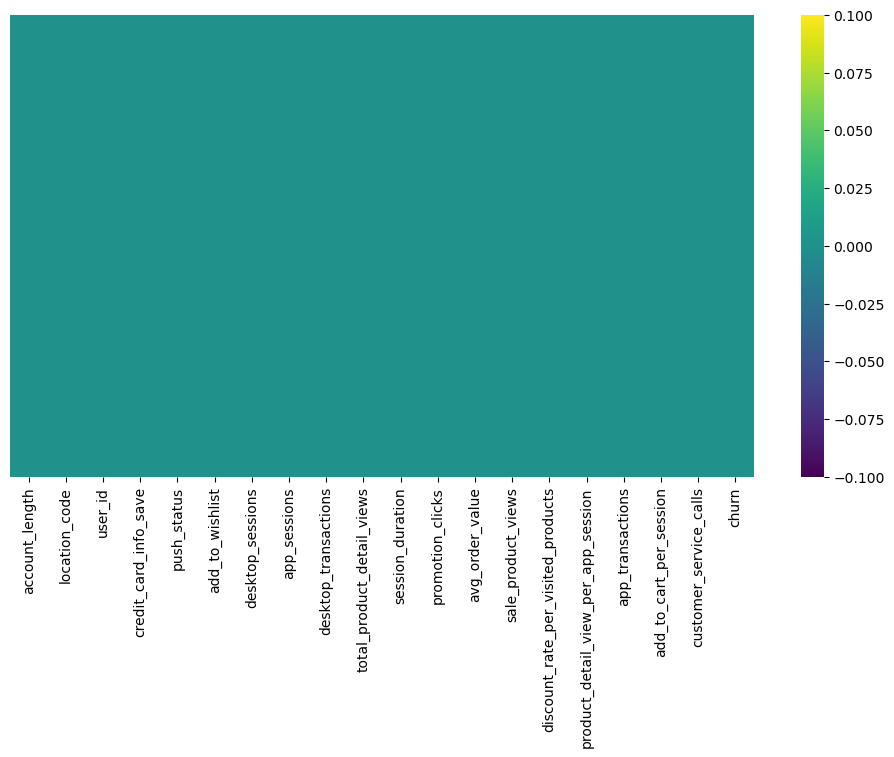

In [11]:
#Checking any missing data on column
plt.figure(figsize=(12,6)) #width=12 inches, height= 6 inches
sns.heatmap(data.isnull(), yticklabels=False,cbar=True,cmap='viridis') # 'viridus -> '

No missing value in the dataset column

In statistical terms, values ​​that are 3 standard deviations below or above the column mean for each column are outliers. I will delete these.

In [12]:
# remove the column which below or above 3 standard deviation, remove outlier
#calculates the lower and upper bounds for outliers based on a z-score approach (3 standard deviations from the mean)
outliers = []
for i in numeric_columns:
    outliers.extend(data[(data[i] < data[i].mean() - 3*data[i].std()) | (data[i] > data[i].mean() + 3*data[i].std())].index)


In [13]:
data.drop(set(outliers),inplace = True)
data.churn.value_counts()

churn
0    2726
1     442
Name: count, dtype: int64

After deleting the Outliers, 3168 customers remained. 442 of these are churn customers, 2726 are non-churn customers.


In [14]:
#Check the number of churn after deleting the outlierround(data.describe(),2)

data.churn.value_counts().sum()


3168

In [15]:
round(data.describe(), 2)

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3168.00,3168.00,3168.00,3168.0,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00
mean,100.88,437.42,3744698.02,0.1,0.27,7.98,180.32,30.66,17.10,100.61,201.19,100.20,200.94,100.03,9.04,10.31,4.37,2.78,1.51,0.14
std,39.47,42.50,275205.04,0.3,0.45,13.59,53.83,9.16,4.27,19.73,50.01,19.61,49.99,19.41,2.25,2.67,2.15,0.72,1.22,0.35
min,1.00,408.00,3271058.00,0.0,0.00,0.00,18.00,3.00,5.00,42.00,53.00,42.00,50.10,42.00,2.25,2.00,1.00,0.54,0.00,0.00
25%,74.00,408.00,3506353.00,0.0,0.00,0.00,144.00,24.00,14.00,87.00,167.00,87.00,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,100.00,415.00,3744099.00,0.0,0.00,0.00,180.00,31.00,17.00,101.00,201.00,100.00,201.10,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,3986153.25,0.0,1.00,19.00,217.00,37.00,20.00,114.00,235.00,114.00,235.62,113.00,10.60,12.10,6.00,3.27,2.00,0.00
max,217.00,510.00,4229964.00,1.0,1.00,49.00,337.00,57.00,30.00,160.00,352.00,159.00,352.50,158.00,15.86,18.40,11.00,4.97,5.00,1.00


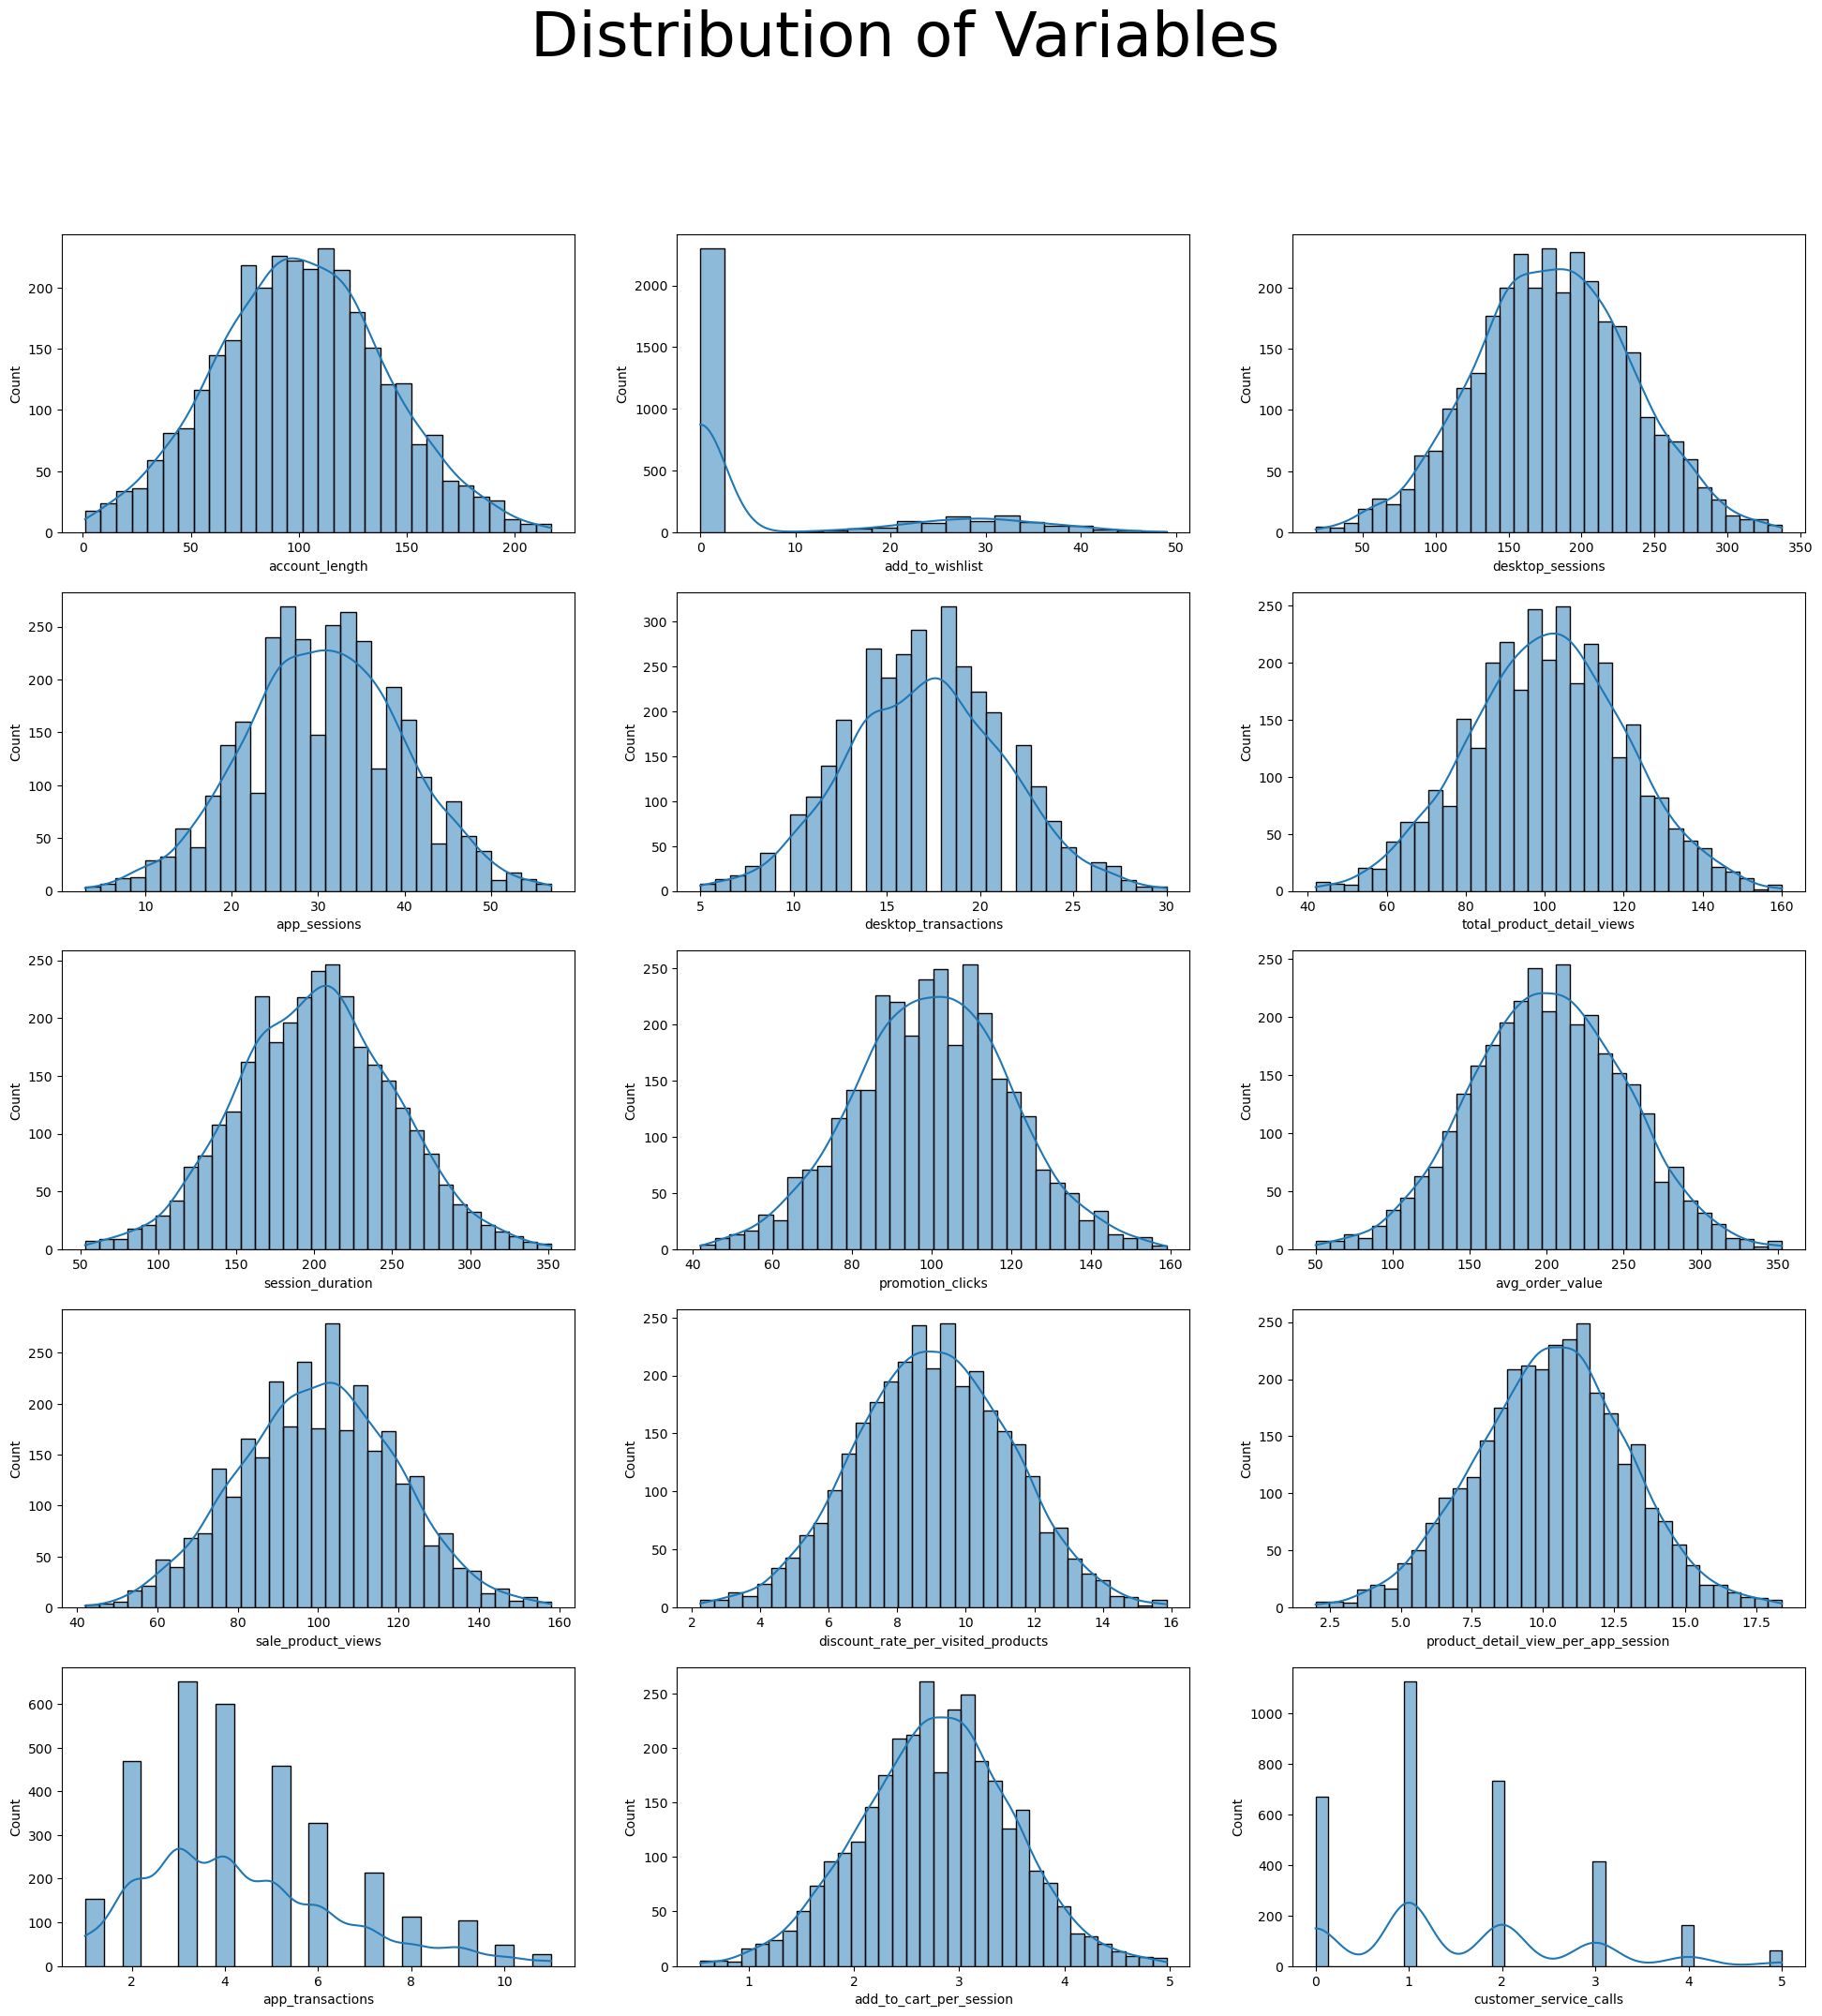

In [16]:
fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of Variables", size=48)

for i in range(5):
    for j in range(3):
        sns.histplot(data[numeric_columns[3*i+j]], ax=axes[i,j], kde=True)


The variables generally converge to a normal distribution, but the variables app_transactions, add_to_wishlist and customer_service_calls appear to be skewed to the right.

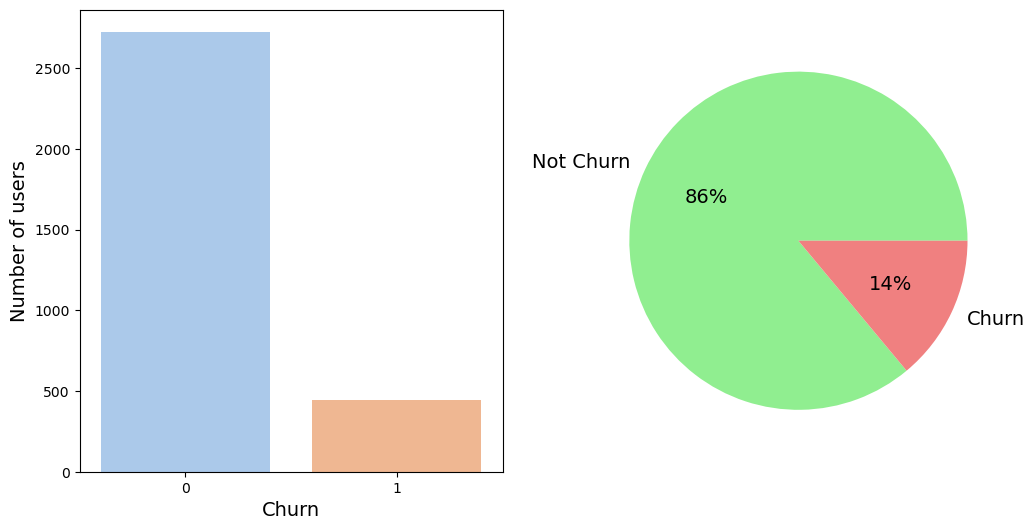

In [17]:
fig, ax = plt.subplots(1,2,figsize= (12,6))
plt.pie(data.churn.value_counts(),labels = ["Not Churn","Churn"],colors = ["lightgreen","lightcoral"],autopct='%.0f%%',textprops={'fontsize': 14})
cp = sns.countplot(x='churn', data=data, ax=ax[0], palette="pastel")  
cp.set_xlabel("Churn",fontsize=14)
cp.set_ylabel("Number of users",fontsize=14)
plt.show()

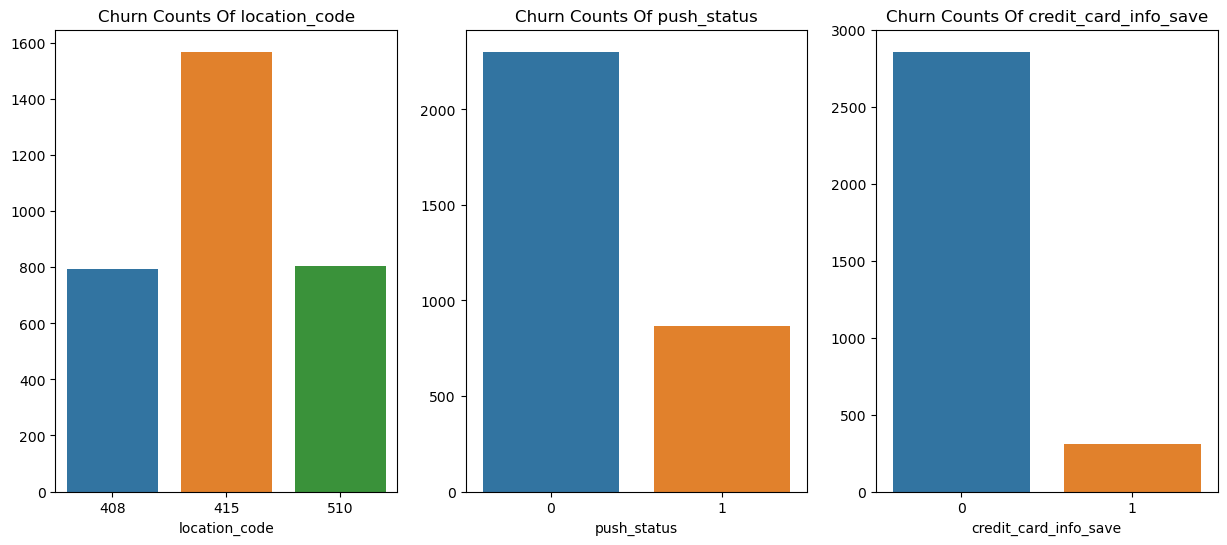

In [18]:
fig, ax = plt.subplots(1,len(categorical_columns),figsize= (15,6))
for i,a in zip(categorical_columns,ax):
    temp = data[i].value_counts()
    a.set_title("Churn Counts Of " + str(i))
    sns.barplot(ax = a, x=temp.index, y=temp.values) 
plt.show()

- Concentration in the location code of 415, concentration in favor of False in the push_status and credit_card_info_save columns. 
- In other words, the majority of Churned users consist of users who do not receive notifications and do not register their credit cards.

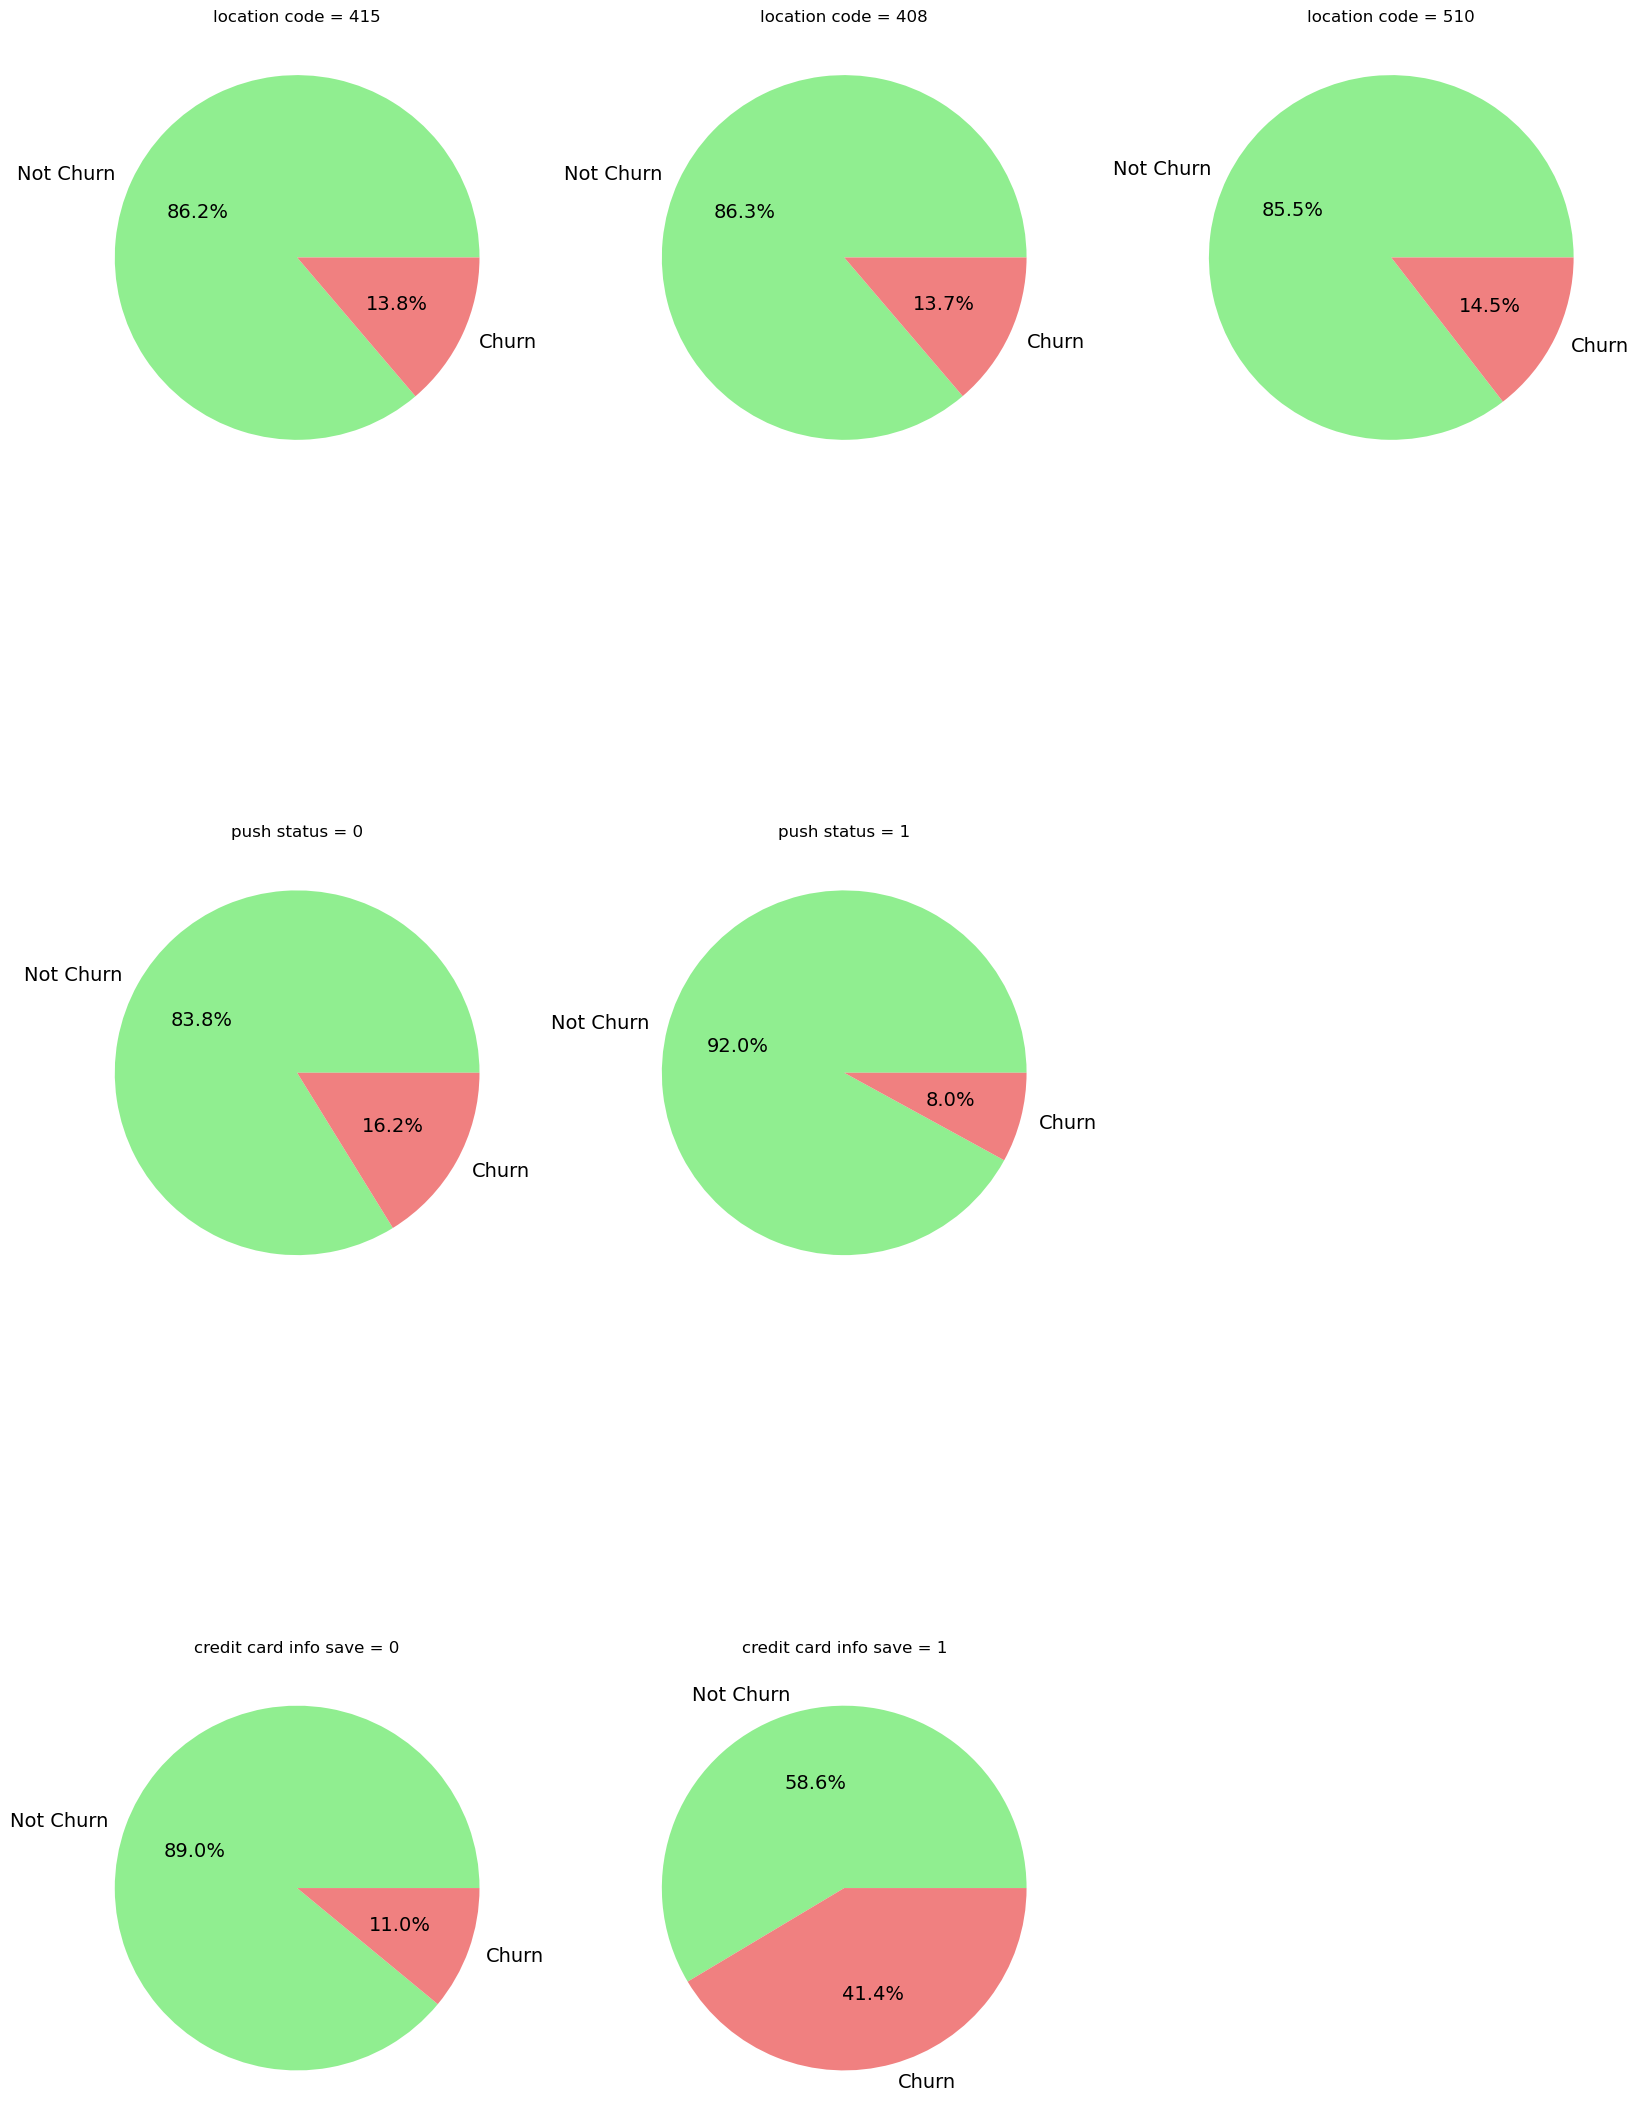

In [19]:
plt.figure(1, figsize=(20,30))
the_grid = GridSpec(3, 3)

plt.subplot(the_grid[0, 0], aspect=1, title='location code = 415')
source_pie = plt.pie(data[data[categorical_columns[0]] == data[categorical_columns[0]].unique()[0]].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 1], aspect=1, title='location code = 408')
source_pie = plt.pie(data[data[categorical_columns[0]] == data[categorical_columns[0]].unique()[1]].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 2], aspect=1, title='location code = 510')
source_pie = plt.pie(data[data[categorical_columns[0]] == data[categorical_columns[0]].unique()[2]].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 0], aspect=1, title='push status = 0')
source_pie = plt.pie(data[data[categorical_columns[1]] == 0].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 1], aspect=1, title='push status = 1')
source_pie = plt.pie(data[data[categorical_columns[1]] == 1].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 0], aspect=1, title='credit card info save = 0')
source_pie = plt.pie(data[data[categorical_columns[2]] == 0].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 1], aspect=1, title='credit card info save = 1')
source_pie = plt.pie(data[data[categorical_columns[2]] == 1].churn.value_counts(), labels = ["Not Churn","Churn"], colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})


plt.show()

 No difference between the location_code groups, but there is a 2-fold difference in the push_status case and a 4-fold difference in the credit_card_info_save column. Therefore,  push_status and credit_card_info_save will be important on the discriminative power of the model.

In [20]:
data.groupby("credit_card_info_save").mean().round(2)


,account_length,location_code,user_id,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
credit_card_info_save,,,,,,,,,,,,,,,,,,,
0,100.60,436.78,3742545.19,0.27,7.95,179.54,30.52,17.08,100.56,201.04,100.18,201.36,99.95,9.06,10.28,4.36,2.78,1.52,0.11
1,103.48,443.28,3764616.98,0.28,8.24,187.59,31.93,17.27,101.04,202.61,100.36,196.97,100.74,8.86,10.59,4.39,2.86,1.47,0.41


In [21]:
data.groupby("location_code").mean().round(2)


,account_length,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
location_code,,,,,,,,,,,,,,,,,,,
408,102.02,3736257.70,0.09,0.26,7.60,176.71,30.03,17.11,100.77,201.44,99.86,199.10,98.87,8.96,10.19,4.29,2.75,1.45,0.14
415,100.94,3751344.92,0.09,0.28,8.24,182.35,31.00,17.08,100.74,200.79,100.53,202.37,100.31,9.11,10.42,4.43,2.81,1.51,0.14
510,99.63,3740063.02,0.12,0.27,7.83,179.94,30.60,17.14,100.20,201.74,99.88,199.96,100.62,9.00,10.21,4.31,2.76,1.59,0.15


In [22]:
data.groupby("push_status").mean().round(2)


,account_length,location_code,user_id,credit_card_info_save,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
push_status,,,,,,,,,,,,,,,,,,,
0,100.60,437.53,3740377.17,0.1,0.00,180.51,30.69,17.05,100.76,200.72,100.29,200.71,99.95,9.03,10.31,4.38,2.79,1.54,0.16
1,101.61,437.13,3756183.72,0.1,29.18,179.85,30.56,17.22,100.21,202.46,99.95,201.54,100.22,9.07,10.29,4.33,2.78,1.45,0.08


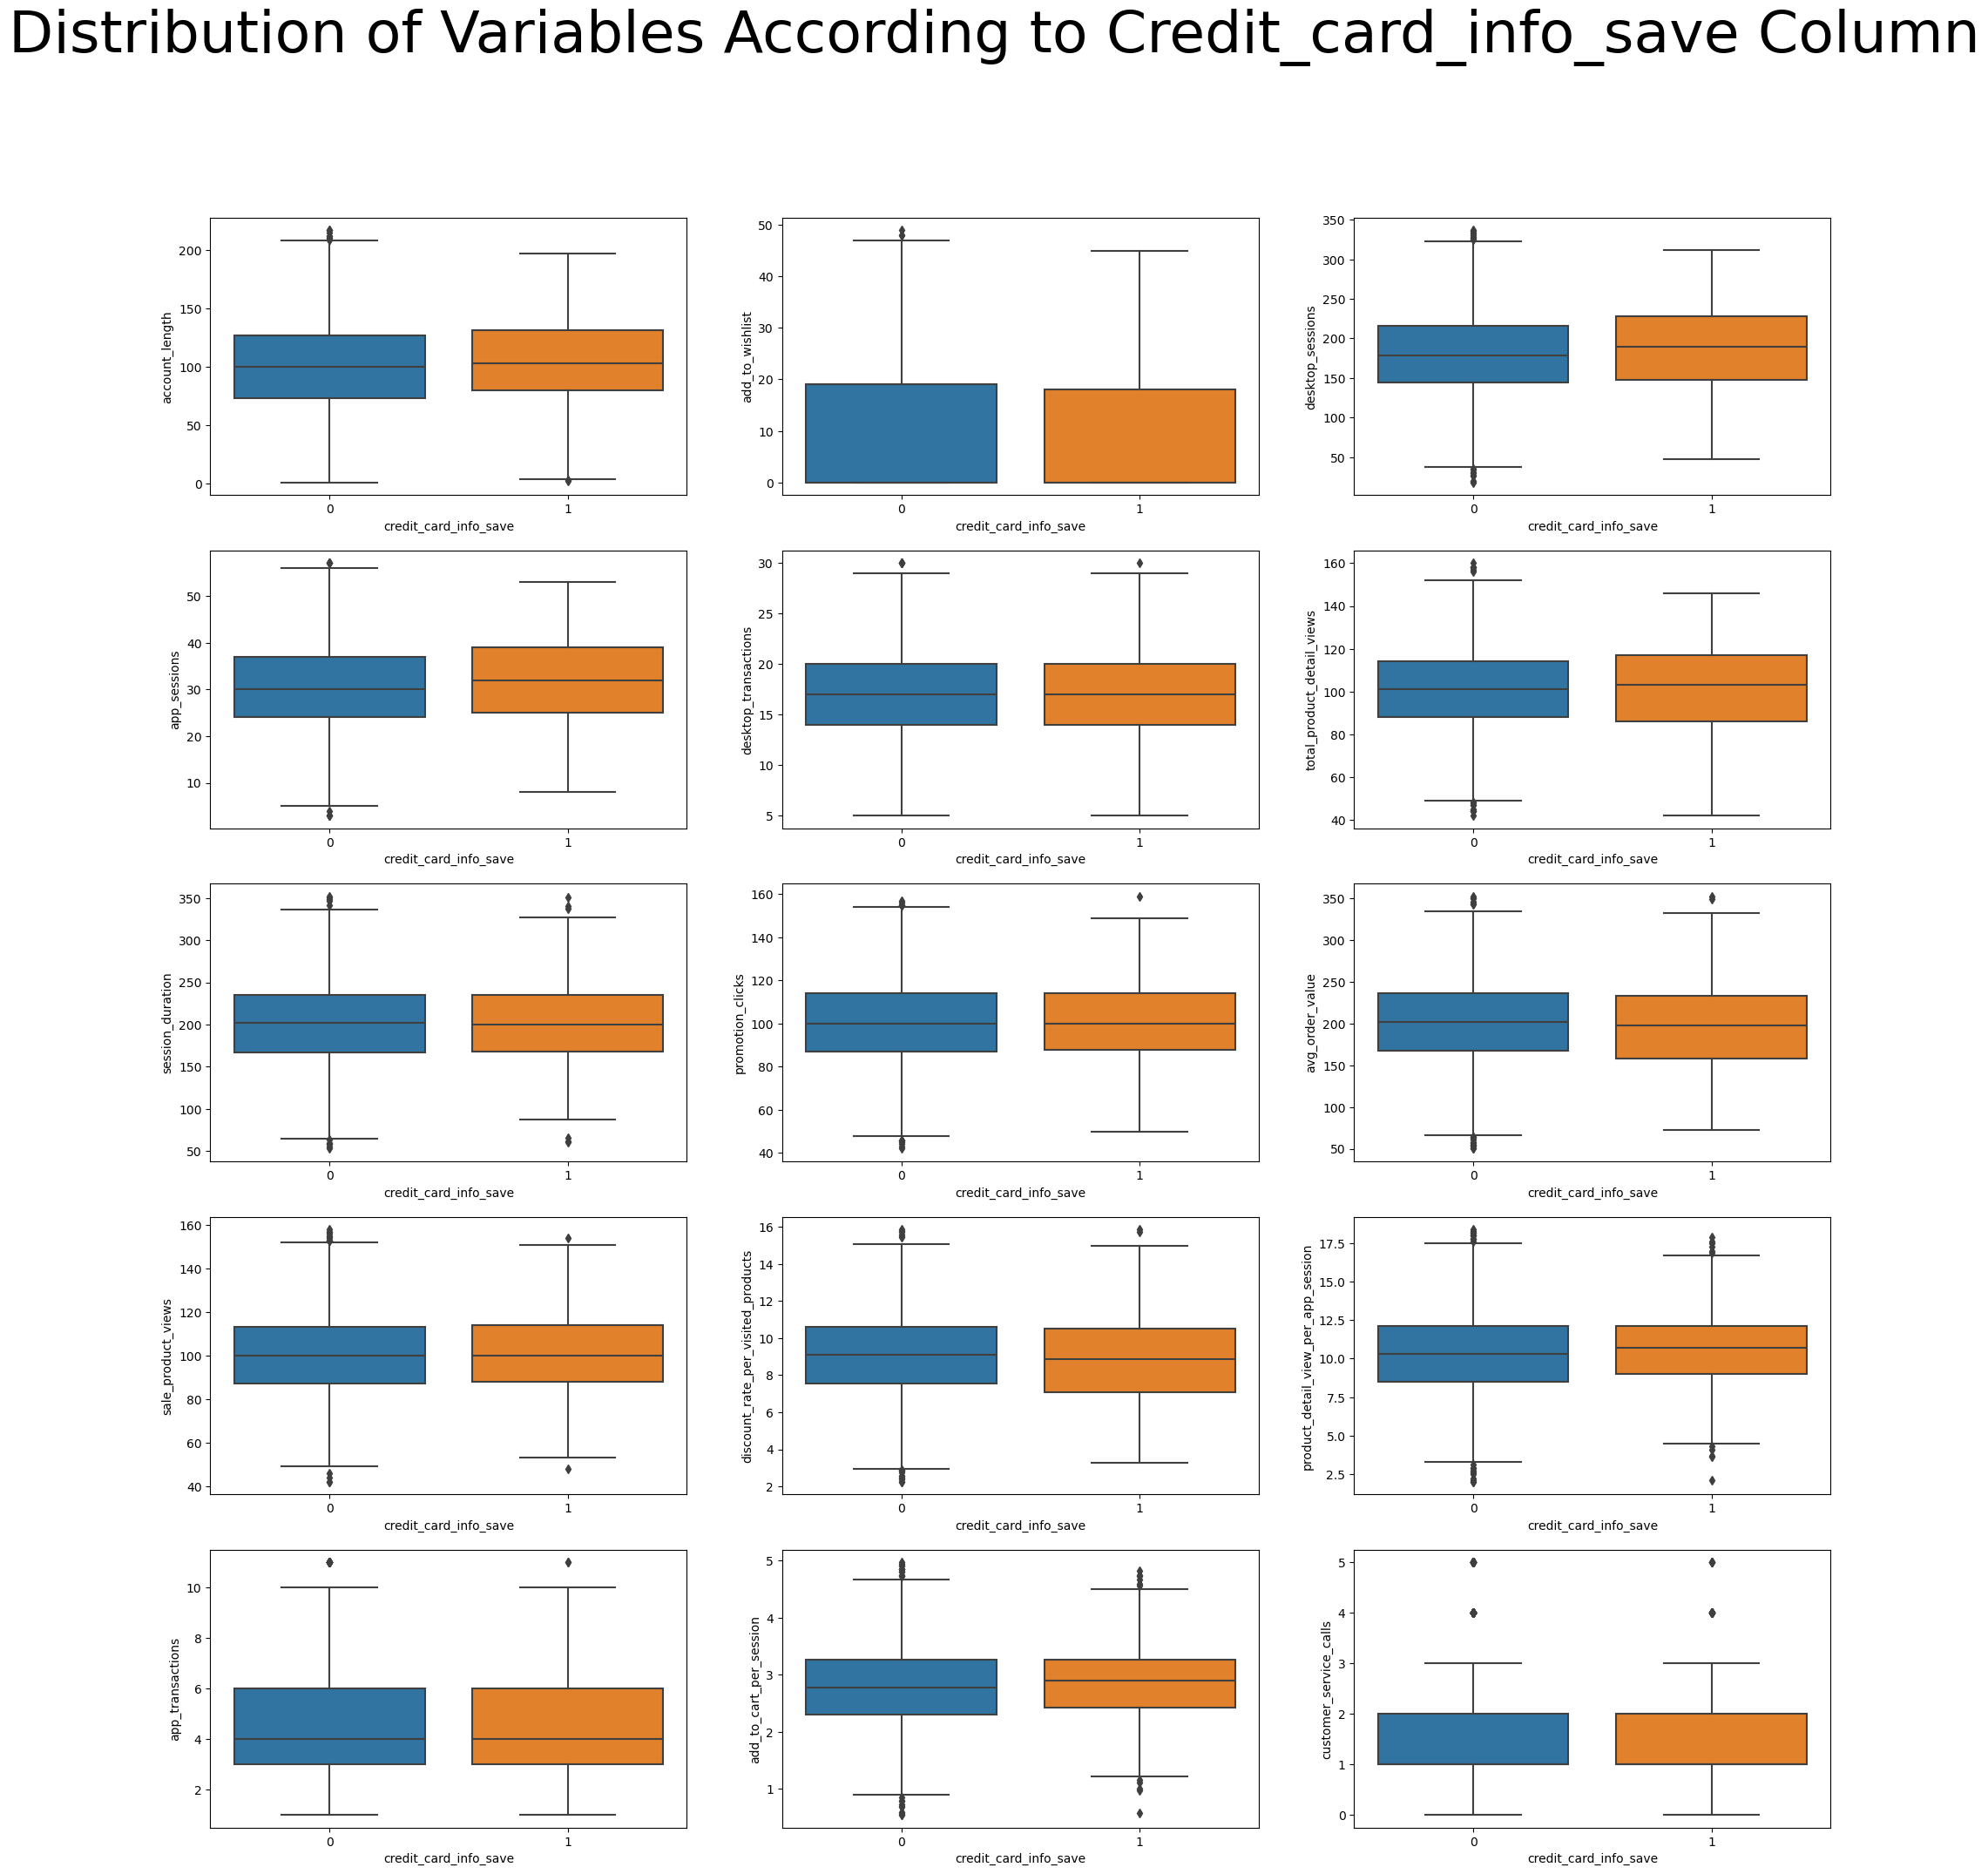

In [23]:
fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of Variables According to Credit_card_info_save Column", size=48)
for i in range(5):
    for j in range(3):
        sns.boxplot(x=data['credit_card_info_save'], y=data[numeric_columns[3*i+j]], ax=axes[i,j])

Credit card registration has no significant effect on most of the other variables, the outliers are similarly scattered.

In [24]:
one_hot = pd.get_dummies(data['location_code'], drop_first = True, prefix = "_")
del data["location_code"]
data = data.join(one_hot)

In [25]:
Logit = LogisticRegression(solver='liblinear',random_state = 8)
Sdgc = SGDClassifier(random_state = 8)
Knn = KNeighborsClassifier()
Dtree = DecisionTreeClassifier(random_state = 8)
Rndfr = RandomForestClassifier(random_state = 8)
Mlp = MLPClassifier(random_state = 8)
Xgb = XGBClassifier(random_state = 8,eval_metric='mlogloss')
lgbm = LGBMClassifier(random_state = 8)

Algorithms =[Logit,Knn,Dtree,Rndfr,Xgb,lgbm,Mlp,Sdgc]

In [26]:
X = data.drop(out_of_analyze, axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

In [27]:
l = []

for i in Algorithms:
    res = i.fit(X_train,y_train)
    l.append([str(i).split("(")[0],confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    print(str(i).split("(")[0]," - "," ✓")
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
results_raw = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_churn_count","f1score","accuracyscore"]).fillna(0)
results_raw = results_raw.sort_values("f1score",ascending = False)
results_raw

LogisticRegression  -   ✓


KNeighborsClassifier  -   ✓
DecisionTreeClassifier  -   ✓
RandomForestClassifier  -   ✓
XGBClassifier  -   ✓
[LightGBM] [Info] Number of positive: 297, number of negative: 1825
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1860
[LightGBM] [Info] Number of data points in the train set: 2122, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139962 -> initscore=-1.815603
[LightGBM] [Info] Start training from score -1.815603
LGBMClassifier  -   ✓
MLPClassifier  -   ✓
SGDClassifier  -   ✓


,model,recall1,recall0,precision1,precision0,precision_sample,real_churn_count,f1score,accuracyscore
4,XGBClassifier,0.710345,0.994451,0.953704,0.955224,108,145,0.814229,0.955
5,LGBMClassifier,0.710345,0.991121,0.927928,0.955080,111,145,0.804687,0.952
3,RandomForestClassifier,0.662069,0.996670,0.969697,0.948258,99,145,0.786885,0.950
2,DecisionTreeClassifier,0.710345,0.945616,0.677632,0.953020,152,145,0.693603,0.913
1,KNeighborsClassifier,0.282759,0.981132,0.706897,0.894737,58,145,0.403941,0.884
6,MLPClassifier,0.172414,0.985572,0.657895,0.880952,38,145,0.273224,0.873
0,LogisticRegression,0.172414,0.982242,0.609756,0.880597,41,145,0.268817,0.870
7,SGDClassifier,0.000000,1.000000,0.000000,0.861377,0,145,0.000000,0.861


- Most performing algorithm in terms of both accuracy and f1 score is XGBoost
- Superior performance of decision tree-based models 
- Proceed with the random forest algorithm whose performance is close to XGBoost

In [28]:
results = []
results = results_raw[results_raw.model == "RandomForestClassifier"]
results.model = "Random Forest Classifier Raw Model[1]"

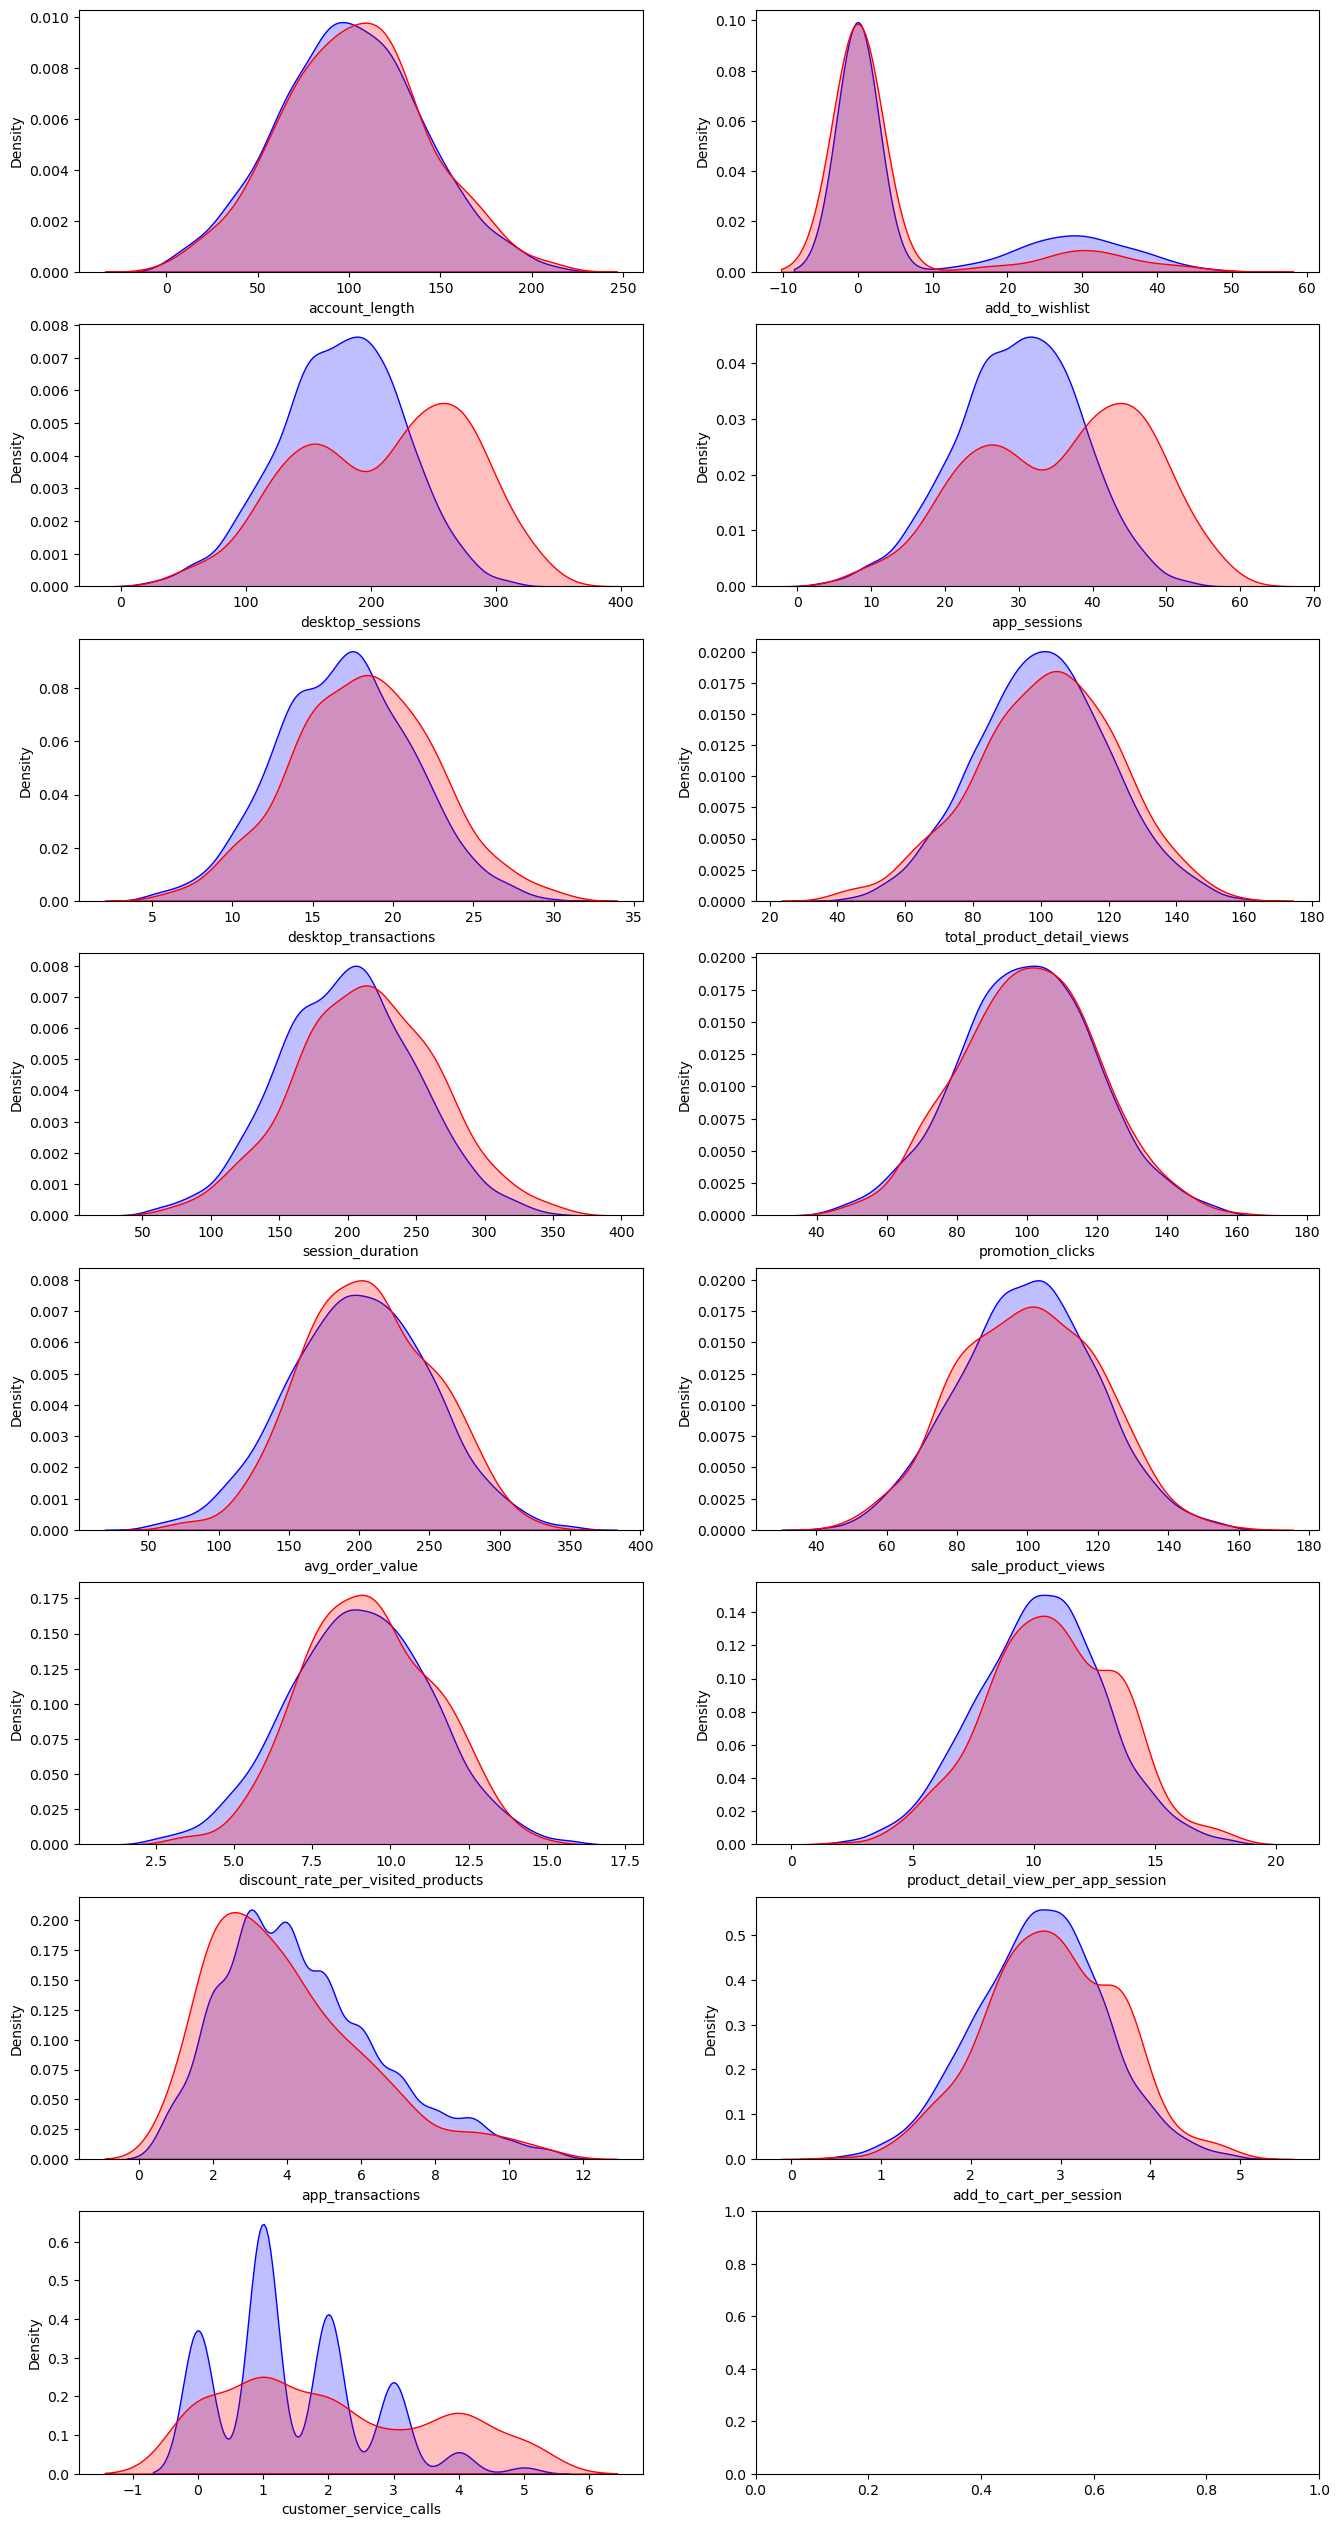

In [29]:
fig, ax = plt.subplots(8,2, figsize=(16,32))

for i in range(8):
    for j in range(2):
        sns.kdeplot(data[numeric_columns[2*i+j]][data['churn'] == 0], ax=ax[i,j], shade=True, color="b")
        sns.kdeplot(data[numeric_columns[2*i+j]][data['churn'] == 1], ax=ax[i,j], shade=True, color="r")
        if 2*i+j >13:
            break

- Significant differences in the cutomer_service_calls, desktop_sessions and app_sessions columns. In other columns, I observe close distributions.
- Columns that converge excessively are location_code, account_length, promotion_clicks, sale_product_views, and avg_order_value. It would be rational to exclude these columns from modelling.

In [30]:
out_of_analyze.extend(["account_length","promotion_clicks","sale_product_views","avg_order_value"])

Do the P-values and statistical (null hypothesis)

In [31]:
lnorm = []
for col in data.columns.drop(out_of_analyze):
    lnorm.append([col,
                  stats.kstest(data[col], 'norm').pvalue, 
                  stats.kstest(data[col][data.churn == 0], data[col][data.churn == 1]).pvalue,
                  stats.levene(data[col][data.churn == 0],data[col][data.churn == 1]).pvalue,
                  stats.f_oneway(data[col][data.churn == 0], data[col][data.churn == 1]).pvalue
                  ])
pvalues = pd.DataFrame(lnorm,columns=["Column","Normality Test","Kolmogorov-Smirnov Test","Levene Test","Anova"])
round(pvalues,4)



,Column,Normality Test,Kolmogorov-Smirnov Test,Levene Test,Anova
0,credit_card_info_save,0.0,0.0000,0.0000,0.0000
1,push_status,0.0,0.0000,0.0000,0.0000
2,add_to_wishlist,0.0,0.0000,0.0000,0.0000
3,desktop_sessions,0.0,0.0000,0.0000,0.0000
4,app_sessions,0.0,0.0000,0.0000,0.0000
5,desktop_transactions,0.0,0.0001,0.1818,0.0000
6,total_product_detail_views,0.0,0.2121,0.0814,0.2373
7,session_duration,0.0,0.0000,0.2769,0.0000
8,discount_rate_per_visited_products,0.0,0.0985,0.0439,0.0249
9,product_detail_view_per_app_session,0.0,0.0005,0.2445,0.0002


- Normality Test: None of the variables exactly fit the normal distribution. (p<0.05) This test is a prerequisite for anova.

- Kolmogorov-Smirnov Test: In most of the variables, there are significant differences in the distributions of being churn and not being churn. (p<0.05)

- Levene Test: The variances of 8 of the variables being churn or not are homogeneous. (p>0.05) This test is a prerequisite for anova.

- Anova Test: In most of the variables, churn and non-churn situations are significantly different from each other. (p<0.05)


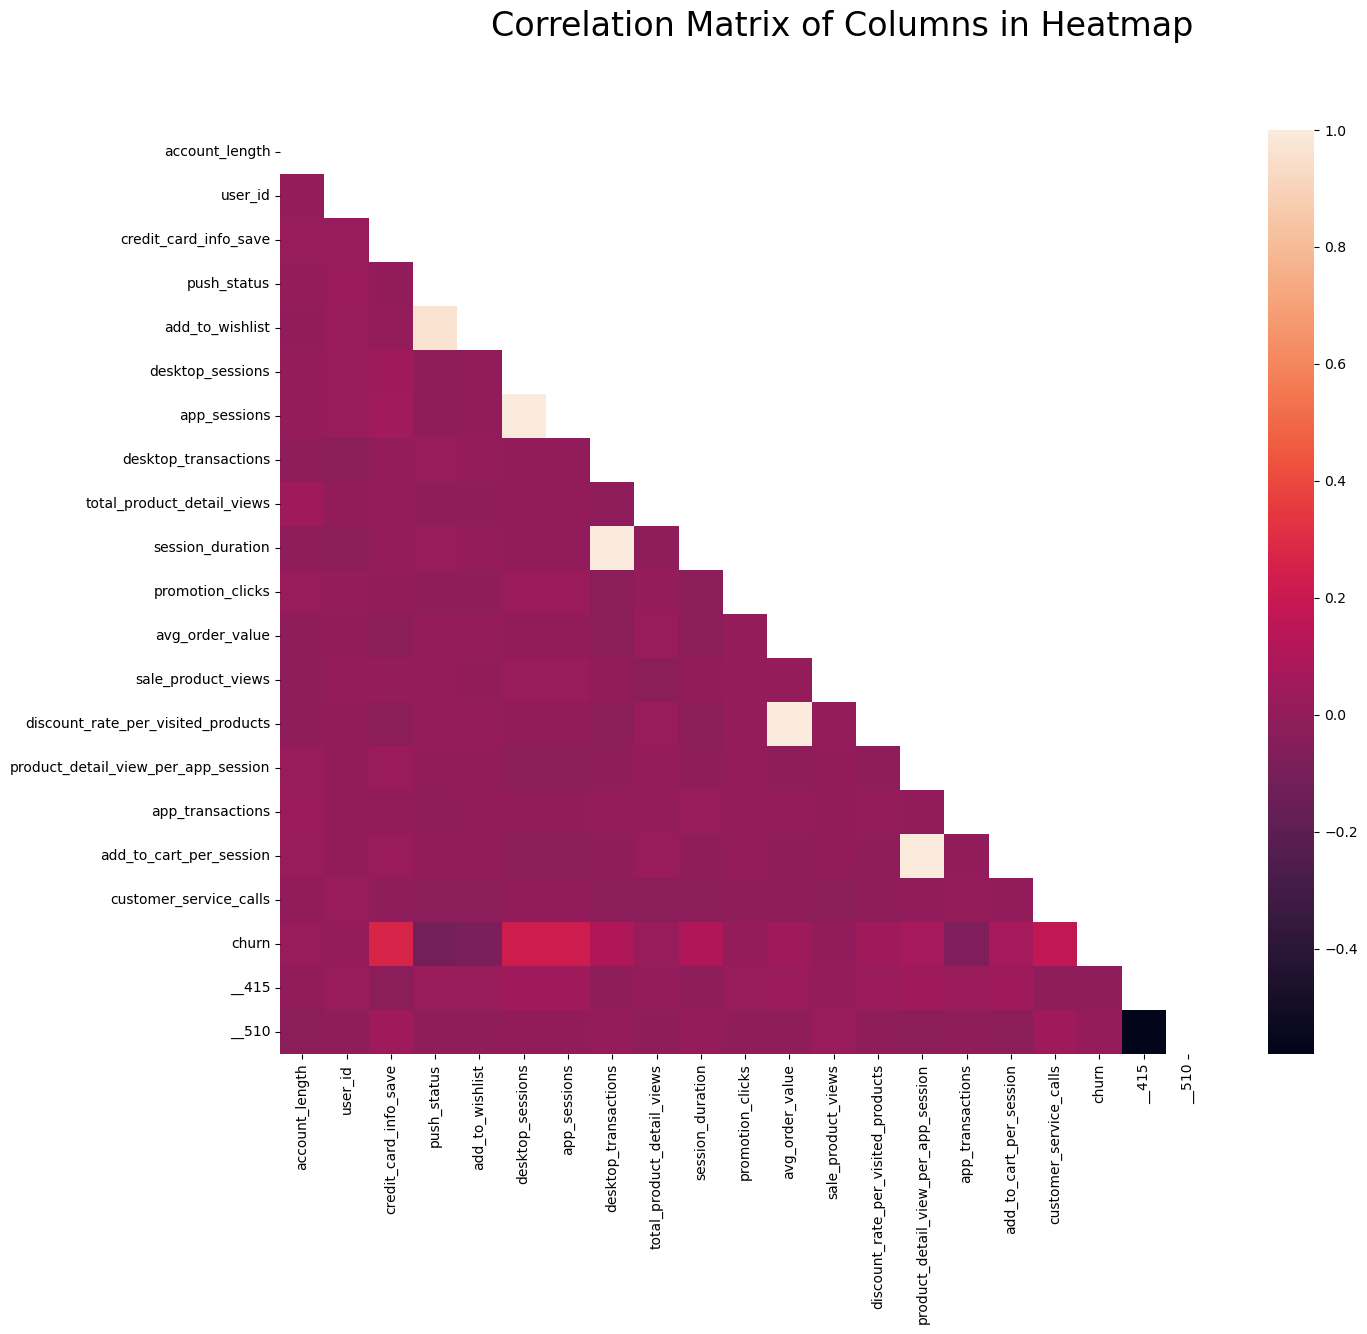

In [32]:
mtr = round(data.corr(),2)
mask = np.zeros_like(mtr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,12))
plt.suptitle("Correlation Matrix of Columns in Heatmap", size=24)
sns.heatmap(mtr, mask= mask, annot=True, annot_kws={"size": 10});

According to the correlation matrix,

- session_duration and desktop_transactions

- discount_rate_per_visited_products and avg_order_value

- add_to_card_per_session and product_detail_view_per_app_session

- app_sessions and desktop_sessions


The column pairs are highly correlated with each other. 
While the add_to_wishlist and push_status columns are highly correlated with each other. We only need to take one of the relevant columns. We need to look at feature importance to determine which ones to delete.

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       940
           1       0.68      0.93      0.79       106

    accuracy                           0.95      1046
   macro avg       0.84      0.94      0.88      1046
weighted avg       0.96      0.95      0.95      1046

[[894  46]
 [  7  99]]


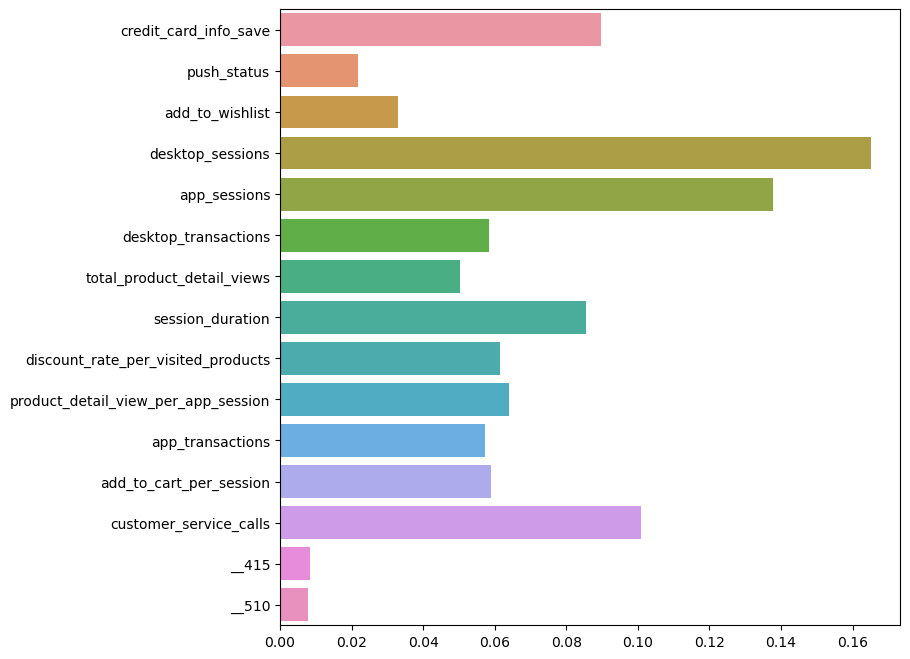

In [33]:
X = data.drop(out_of_analyze,axis = 1)
y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

rndforest = RandomForestClassifier(random_state=8)
rndforest.fit(X_train, y_train)

y_pred = rndforest.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=rndforest.feature_importances_, y=X.columns)
plt.show()


By looking at the Feature Importances, we select the bold ones among our fully related pairs.

- session_duration and desktop_transactions

- discount_rate_per_visited_products and avg_order_value (we removed this before)

- add_to_card_per_session and product_detail_view_per_app_session

- app_sessions and desktop_sessions

- add_to_wishlist and push_status

In addition, we will remove 415 and 510 as they have poor descriptiveness.

In [34]:
out_of_analyze.extend(["desktop_transactions","add_to_cart_per_session","app_sessions","push_status","__415","__510"])

In [35]:
results = results_raw[results_raw.model == "RandomForestClassifier"]
results.model = "Random Forest Classifier Raw Model[1]"

In [36]:
X = data.drop(out_of_analyze,axis = 1)
y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

l = []
rndforest = RandomForestClassifier(random_state=8)
rndforest.fit(X_train, y_train)

res = rndforest.fit(X_train,y_train)
l.append(["Random Forest Classifier with F.Selection [2]",confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])

a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
results_feature_sel = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_churn_count","f1score","accuracyscore"]).fillna(0)
results_feature_sel = results_feature_sel.sort_values("f1score",ascending = False)
results = pd.concat([results, results_feature_sel], axis=0)

results

,model,recall1,recall0,precision1,precision0,precision_sample,real_churn_count,f1score,accuracyscore
3,Random Forest Classifier Raw Model[1],0.662069,0.996670,0.969697,0.948258,99,145,0.786885,0.950
0,Random Forest Classifier with F.Selection [2],0.710345,0.994451,0.953704,0.955224,108,145,0.814229,0.955


In [37]:
Rndfr_params = {'n_estimators':[5,50,100,200],
                'criterion': ['gini','entropy'],
                'bootstrap': [True, False],
                'max_depth': list(range(1,10)),
                'max_features': [3,'auto']} 

clf = GridSearchCV(rndforest, Rndfr_params,scoring = "f1")
clf.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 'auto'],
                         'n_estimators': [5, 50, 100, 200]},
             scoring='f1')

In [38]:
clf.best_params_


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 3,
 'n_estimators': 200}

In [39]:
rndforest = RandomForestClassifier(bootstrap= False,criterion= 'entropy', max_features= 3, n_estimators= 205, random_state = 8)

l = []
res = rndforest.fit(X_train,y_train)
l.append(["Random Forest Classifier with H.Optimization [3]",confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
results_feature_opt = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_churn_count","f1score","accuracyscore"]).fillna(0)
results_feature_opt = results_feature_opt.sort_values("f1score",ascending = False)
results = pd.concat([results, results_feature_opt], axis=0)
results

,model,recall1,recall0,precision1,precision0,precision_sample,real_churn_count,f1score,accuracyscore
3,Random Forest Classifier Raw Model[1],0.662069,0.996670,0.969697,0.948258,99,145,0.786885,0.950
0,Random Forest Classifier with F.Selection [2],0.710345,0.994451,0.953704,0.955224,108,145,0.814229,0.955
0,Random Forest Classifier with H.Optimization [3],0.703448,0.987791,0.902655,0.953912,113,145,0.790698,0.948


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8)

l = []
res = rndforest.fit(X_train,y_train)
l.append(["Random Forest Classifier %40 Test Size [4]",confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
results_feature_40 = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_churn_count","f1score","accuracyscore"]).fillna(0)
results_feature_40 = results_feature_40.sort_values("f1score",ascending = False)
results = pd.concat([results, results_feature_40], axis=0)
results

,model,recall1,recall0,precision1,precision0,precision_sample,real_churn_count,f1score,accuracyscore
3,Random Forest Classifier Raw Model[1],0.662069,0.996670,0.969697,0.948258,99,145,0.786885,0.950
0,Random Forest Classifier with F.Selection [2],0.710345,0.994451,0.953704,0.955224,108,145,0.814229,0.955
0,Random Forest Classifier with H.Optimization [3],0.703448,0.987791,0.902655,0.953912,113,145,0.790698,0.948
0,Random Forest Classifier %40 Test Size [4],0.755682,0.986264,0.898649,0.961607,148,176,0.820988,0.954


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

l = []
res = rndforest.fit(X_train,y_train)
l.append(["Random Forest Classifier %20 Test Size [5]",confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
results_feature_20 = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_churn_count","f1score","accuracyscore"]).fillna(0)
results_feature_20 = results_feature_20.sort_values("f1score",ascending = False)
results = pd.concat([results, results_feature_20], axis=0)
results

,model,recall1,recall0,precision1,precision0,precision_sample,real_churn_count,f1score,accuracyscore
3,Random Forest Classifier Raw Model[1],0.662069,0.996670,0.969697,0.948258,99,145,0.786885,0.950
0,Random Forest Classifier with F.Selection [2],0.710345,0.994451,0.953704,0.955224,108,145,0.814229,0.955
0,Random Forest Classifier with H.Optimization [3],0.703448,0.987791,0.902655,0.953912,113,145,0.790698,0.948
0,Random Forest Classifier %40 Test Size [4],0.755682,0.986264,0.898649,0.961607,148,176,0.820988,0.954
0,Random Forest Classifier %20 Test Size [5],0.767442,0.989051,0.916667,0.964413,72,86,0.835443,0.959


final model is a 20% test size model with Feature Selection and hyperparameter optimization.